In [8]:
def irange(*args):
    """
    An inclusive version of range.
    Can be used with 1, 2, or 3 arguments.
    """
    if len(args) == 0:
        raise TypeError("inclusive_range expected at least 1 argument, got 0")
    elif len(args) == 1:
        start, stop, step = 0, args[0], 1
    elif len(args) == 2:
        start, stop, step = args[0], args[1], 1
    elif len(args) == 3:
        start, stop, step = args
    else:
        raise TypeError(f"inclusive_range expected at most 3 arguments, got {len(args)}")
    
    # Modify stop value to make it inclusive
    if step > 0:
        stop += 1
    else:
        stop -= 1

    return range(start, stop, step)

def swap_elements(lst, index1, index2):
    """
    Swap elements in the list at the given indices.

    Args:
    - lst (list): The list of elements.
    - index1 (int): The index of the first element to swap.
    - index2 (int): The index of the second element to swap.

    Returns:
    - list: The list with swapped elements.
    """
    if index1 < 0 or index1 >= len(lst) or index2 < 0 or index2 >= len(lst):
        raise ValueError("Index out of range")

    lst[index1], lst[index2] = lst[index2], lst[index1]
    return lst

# McLarrenův algoritmus
(Uspořádá položky v poli in situ podle **ptr**)

In [9]:
# Obsah pole dle slajdu 24
first = 1
array = [
    {"key": 13, "ptr":  3},
    {"key":  8, "ptr":  4},
    {"key": 20, "ptr": -1},
    {"key": 15, "ptr":  2},
    {"key": 11, "ptr":  0}
]
MAX=len(array)

def print_array(array):
    i = 0
    for item in array:
        print(f"{i}: key:{item['key']}, ptr:{item['ptr']}")
        i += 1

print_array(array)
print("\n=== MCLARREN'S ALGORITHM ===")

aux = first
for i in irange(0, MAX-2):
    while aux < i:
        aux = array[aux]["ptr"]   ;print(f"UPDATE aux = {aux}")
        
    swap_elements(array, i, aux)  ;print(f"SWAP array[{i}](key {array[i]['key']}) <-> array[{aux}](key {array[aux]['key']})")
    
    print(f"POINTERS: {array[i]['ptr']} <-> {aux}");
    
    newaux = array[i]["ptr"]
    array[i]["ptr"] = aux         ;print(f"array[{i}](key {array[i]['key']}).ptr == {newaux} <-> {aux} (aux)")
    aux = newaux                  ;print(f"aux == {aux}"); print_array(array); print(" ")  

0: key:13, ptr:3
1: key:8, ptr:4
2: key:20, ptr:-1
3: key:15, ptr:2
4: key:11, ptr:0

=== MCLARREN'S ALGORITHM ===
SWAP array[0](key 8) <-> array[1](key 13)
POINTERS: 4 <-> 1
array[0](key 8).ptr == 4 <-> 1 (aux)
aux == 4
0: key:8, ptr:1
1: key:13, ptr:3
2: key:20, ptr:-1
3: key:15, ptr:2
4: key:11, ptr:0
 
SWAP array[1](key 11) <-> array[4](key 13)
POINTERS: 0 <-> 4
array[1](key 11).ptr == 0 <-> 4 (aux)
aux == 0
0: key:8, ptr:1
1: key:11, ptr:4
2: key:20, ptr:-1
3: key:15, ptr:2
4: key:13, ptr:3
 
UPDATE aux = 1
UPDATE aux = 4
SWAP array[2](key 13) <-> array[4](key 20)
POINTERS: 3 <-> 4
array[2](key 13).ptr == 3 <-> 4 (aux)
aux == 3
0: key:8, ptr:1
1: key:11, ptr:4
2: key:13, ptr:4
3: key:15, ptr:2
4: key:20, ptr:-1
 
SWAP array[3](key 15) <-> array[3](key 15)
POINTERS: 2 <-> 3
array[3](key 15).ptr == 2 <-> 3 (aux)
aux == 2
0: key:8, ptr:1
1: key:11, ptr:4
2: key:13, ptr:4
3: key:15, ptr:3
4: key:20, ptr:-1
 


# Select sort

MAX je počet prvků, MAX-1 je index nejvyššího prvku

Jdu s indexy od **i = 0** do **MAX-2**
* Pro každý index i hledám v části **i+1** až **MAX-1** minimum
* Nakonec prvek na indexu **i** prohodím s **minimem**.

např.:

[4, 2, 1, 0] ->

[**0**, 2, 1, 4] ->

[**0**, **1**, 2, 4]

In [10]:
A = [4, 2, 1, 0]
MAX = len(A)
print(A)

for i in irange(0, MAX-2):                   
    indexMin = i                        ;print(f"===== FOR =====\ni = {i}")
    min = A[i]                          ;print(f"min = {A[i]}")
    
    for j in irange(i+1, MAX-1):
        print(f"--- FOR --- j = {j}")
        
        if min > A[j]:
            min = A[j]
            indexMin = j                ;print(f"min = {A[j]}, indexMin = {j}")
    
    swap_elements(A, i, indexMin)       ;print(f"SWAP: {A[i]} <-> {A[indexMin]}")
    
    print(A); print(" ")

[4, 2, 1, 0]
===== FOR =====
i = 0
min = 4
--- FOR --- j = 1
min = 2, indexMin = 1
--- FOR --- j = 2
min = 1, indexMin = 2
--- FOR --- j = 3
min = 0, indexMin = 3
SWAP: 0 <-> 4
[0, 2, 1, 4]
 
===== FOR =====
i = 1
min = 2
--- FOR --- j = 2
min = 1, indexMin = 2
--- FOR --- j = 3
SWAP: 1 <-> 2
[0, 1, 2, 4]
 
===== FOR =====
i = 2
min = 2
--- FOR --- j = 3
SWAP: 2 <-> 2
[0, 1, 2, 4]
 


 ### Zhodnocení Select sort
 * **Nestabilní** - může prohodit pořadí prvků stejným klíčem
 * **Nechová se přirozeně** - případně předem seřazené prvky nemají na počet iterací vliv
 * **Kvadratická** časová složitost O(n^2)
 * Pracuje **in situ** (prostorová složitost O(1))

# Bubble sort (zprava)

Princip stejný jako u **Insert sort**
* Procházíme pole zleva
* Na daný index nakonec zařadíme minimum

Liší se metoda nalezení minima a jeho přesunu
* Nehledáme přímo minimum a jeho index
* Porovnáváme (zprava) každou dvojici
* V případě nesprávného pořadí dvojici prohodíme
* Minimum se bublinkovým průchodem nakonec dostane na správnou pozici
* Zároveň se částečně "urovná" pořadí jiných prvků

Poznámky:
* Vnější cyklus končím, pokud a) už nedošlo k výměně, b) prošli jsme všechny prvky
* Vnější cyklus 
* Když procházím zprava vnitřní (bublinový) průchod, nemusím úplně doleva, ale stačí mi zastavit se na indexu o 1 vyšším.
* Proč používáme **finish** a místo toho **neděláme vnější cyklus jako for**? Bylo by to zbytečné. Pokud je pole **uspořádané**, neprovede se ani 1 výměna -> algoritmus **hned skončí**.   

In [11]:
A = [4, 2, 1, 0]
MAX = len(A)
print(A)

i = 1
while True: # do
    finish = True                      ;print("===== DO =====")
    for j in irange(MAX-1, i, -1):
        if A[j-1] > A[j]:
            swap_elements(A, j-1, j)   ;print(f"SWAP: {A[j-1]} <--> {A[j]}")
            finish = False             ;print(A)
    i = i + 1
    
    if not (not finish and i < MAX): # while
        break


[4, 2, 1, 0]
===== DO =====
SWAP: 0 <--> 1
[4, 2, 0, 1]
SWAP: 0 <--> 2
[4, 0, 2, 1]
SWAP: 0 <--> 4
[0, 4, 2, 1]
===== DO =====
SWAP: 1 <--> 2
[0, 4, 1, 2]
SWAP: 1 <--> 4
[0, 1, 4, 2]
===== DO =====
SWAP: 2 <--> 4
[0, 1, 2, 4]


 ### Bubble sort
* **Stabilní**
* Chová se **přirozeně**
* Pracuje **in situ**
* Kvadratická časová složitost: O(n^2)
* Již seřazená poslouzpnost: O(n) -> nejrychlejší metoda, pokud je pole již seřazené

## Varianty Bubble sortu

### Ripple Sort

* Pamatuje si index, kde byla provedena **první výměna**. Potom neprochází dvojice, u kterých je jasné, že se už nebudou vyměňovat.
  * Když jdeme **probublávání zprava**, je to ta **nejpravější dvojice** - Prvky napravo od ní už nemá smysl znovu procházet.
  * Když jdeme **probublávání zleva**, je to ta **nejlevější dvojice** - Prvky nalevo od ní už nemá smysl znovu procházet.
* Může přinést zrychlení, ale pouze mírné. Řád zůstává kvadratický.


### Shaker Sort

* Též **Bidirectional Bubble sort**, **Coctail Shaker sort**, **Coctail sort**, **Shaker sort**.
* **Střídá směr** probublávání zleva a zprava - "houpačková" metoda.
* Ukládá zároveň minima doleva a maxima doprava.
* Nakonec skončí **uprostřed**.
* Může přinést mírné zrychlení ve specifických případech
  * Méně prvků na nesprávné pozici
    * např.: [2, 1, 3, 4, 6, 5, 7, 8, 9] - Shaker sort zvládne v 1 průchodu, Bubble sort jich potřebuje více
  * Prvky na nesprávné pozici v opačných extrémech
    * např.: [9, 2, 3, 4, 5, 6, 7, 8, 1] - klasický Bubble sort potřebuje 10 průchodů, Shaker sort jen 1
  * Průměrná hodnota má být uprostřed
    * např.: [1, 3, 5, 4, 2, 6, 7, 9, 8] - Shaker sort dostane "5" na správnou pozici rychleji než Bubble sort
  * Dvě podsekvence v opačném pořadí
    * např.: [8, 7, 6, 5, 1, 2, 3, 4, 9]


### Shuttle Sort
* Též **Bubble-Insert sort**.
* Při výměně dvojice zavede **menší z prvků** rovnou na **své místo** a pak teprve pokračuje dál.
* Končí tím, že vymění nepravější dvojici.
* Často vyžaduje **méně operací** (porovnávání a záměn) než Bubble sort, protože prvek rovnou zavádí na správné místo, namísto, aby jej "slepě" posunoval daným směrem.
* Průměrná časová složitost je tak o něco lepší.
* Menší počet oprecací třeba v případech:
  * Téměř seřazeného pole
    * např.: [2, 1, 3, 4, 5, 6, 7, 8, 9]
  * Nesprávně zařazených prvků na začátku pole
    * např.: [2, 1, 3, 4, 5, 6, 7, 8, 9]
  * Méně nesprávně zařezených prvků:
    * např.: [1, 3, 2, 5, 4, 6, 7, 9, 8]
    
Žádná z těchoto optimalizací nemění řád časové složitosti. Ten zůstává **kvadratický** (n^2).

# Heap Sort

**Hromada, halda (Heap)**
* Mezi **otcem** a **syny** platí **stejná relace uspořádání** (zde je otec větší než oba synové).
* Všechny hladiny kromě poslední jsou plně obsazené.
* Poslední hladina je **obsazena zleva**.



In [12]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_heap(A, left, right):
    G = nx.DiGraph()
    
    for i in range(left, right + 1):
        G.add_node(i, label=str(A[i]))
        
        left_child = 2 * i + 1
        right_child = 2 * i + 2

        if left_child <= right:
            G.add_edge(i, left_child)
        if right_child <= right:
            G.add_edge(i, right_child)
    
    pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot", args="-Grankdir=TB")
    labels = {node: G.nodes[node]['label'] for node in G.nodes()}
    
    plt.figure(figsize=(8, 6))
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    nx.draw_networkx(G, pos, with_labels=True, labels=labels, node_size=3000, node_color='skyblue')
    plt.show()

In [21]:
def SiftDown (A, left, right):
    i = left
    j = 2*i+1
    temp = A[i]
    cont = j <= right
    
    while cont:
        if j < right:
            if A[j] < A[j+1]:
                j = j + 1
        
        if temp >= A[j]:
            cont = False
        else:
            A[i] = A[j]
            i = j
            j = 2*i+1
            cont = j <= right
                  
    A[i] = temp

=== ESTABLISH HEAP ===
SiftDown(0, 3) - to all non-leaf nodes


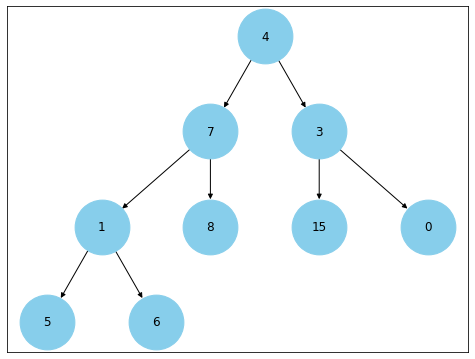

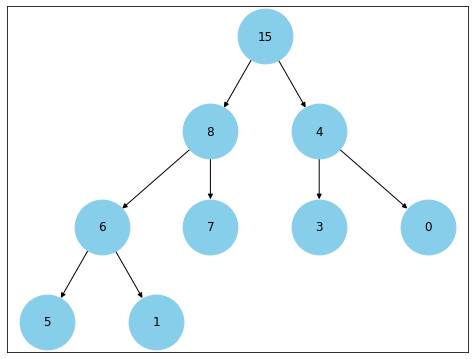

[1, 8, 4, 6, 7, 3, 0, 5, 15]

== SIFTDOWN (A, 0, 7) ==


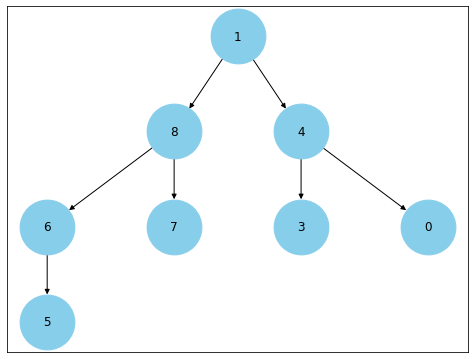

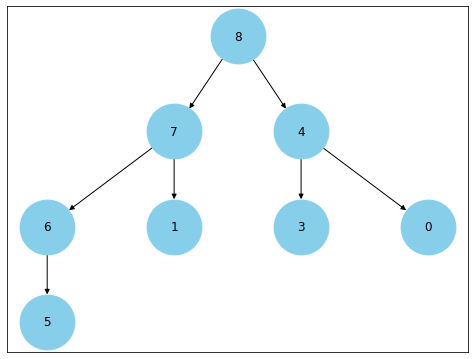

[5, 7, 4, 6, 1, 3, 0, 8, 15]

== SIFTDOWN (A, 0, 6) ==


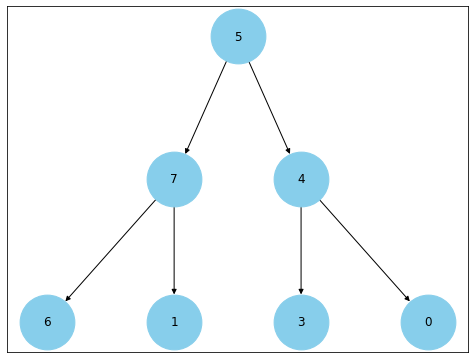

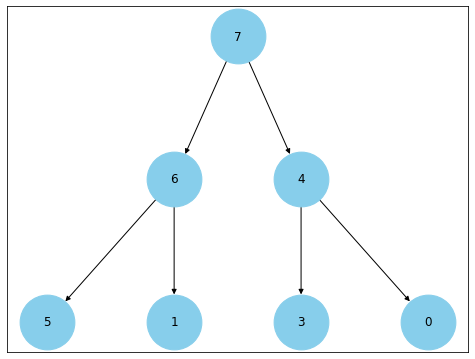

[0, 6, 4, 5, 1, 3, 7, 8, 15]

== SIFTDOWN (A, 0, 5) ==


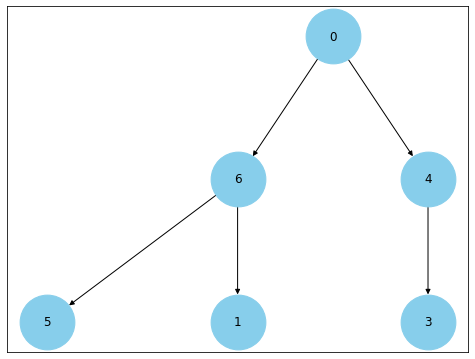

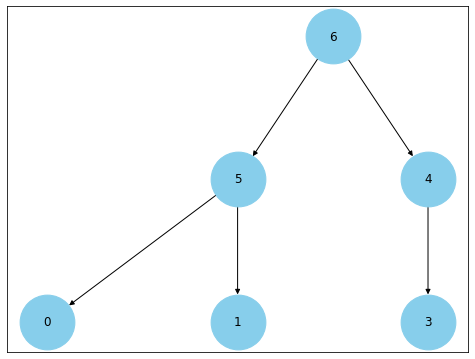

[3, 5, 4, 0, 1, 6, 7, 8, 15]

== SIFTDOWN (A, 0, 4) ==


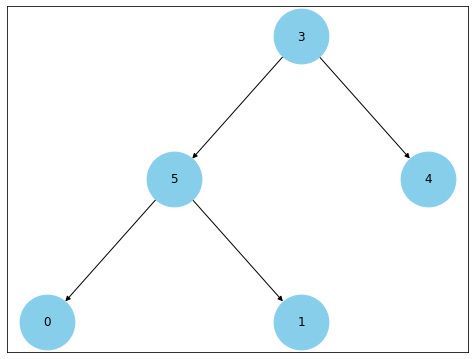

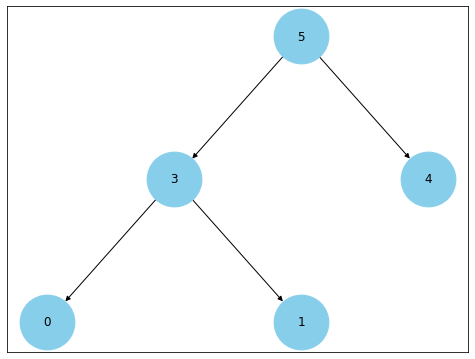

[1, 3, 4, 0, 5, 6, 7, 8, 15]

== SIFTDOWN (A, 0, 3) ==


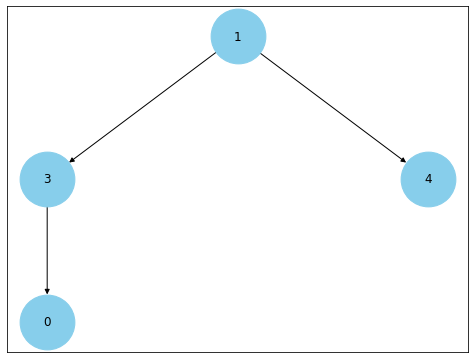

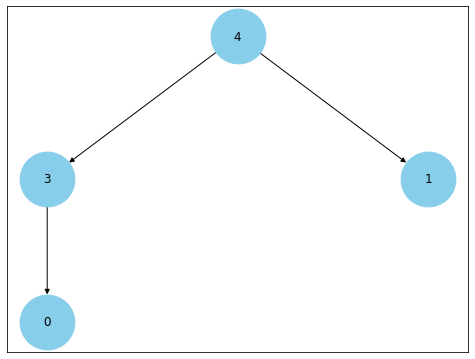

[0, 3, 1, 4, 5, 6, 7, 8, 15]

== SIFTDOWN (A, 0, 2) ==


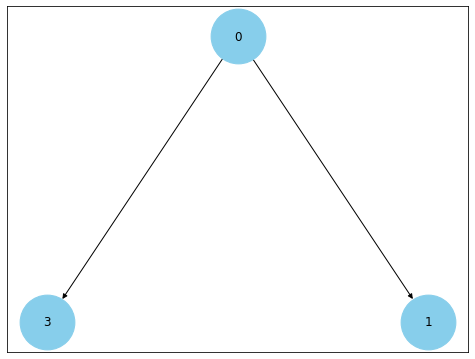

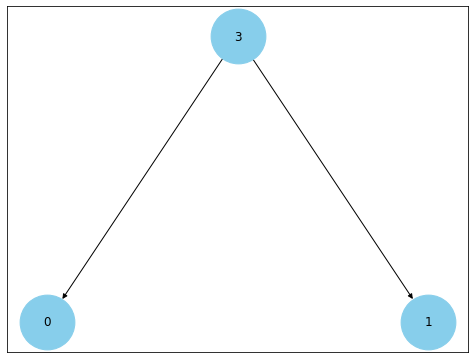

[1, 0, 3, 4, 5, 6, 7, 8, 15]

== SIFTDOWN (A, 0, 1) ==


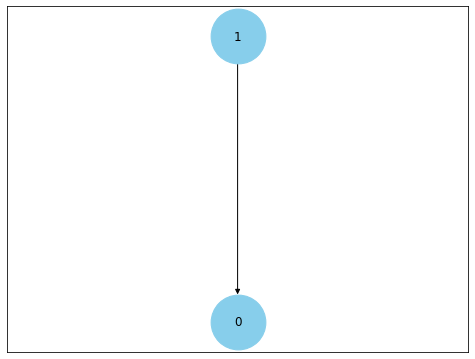

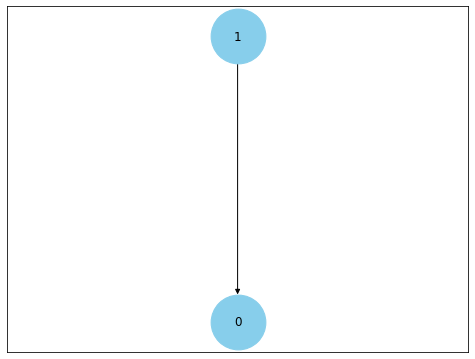

[0, 1, 3, 4, 5, 6, 7, 8, 15]

== SIFTDOWN (A, 0, 0) ==


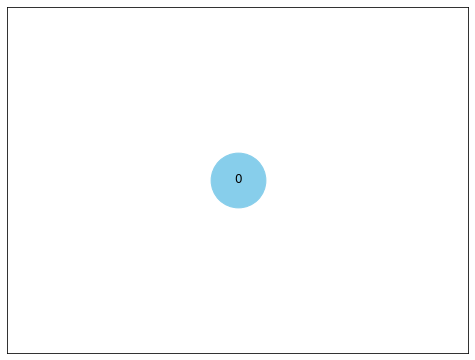

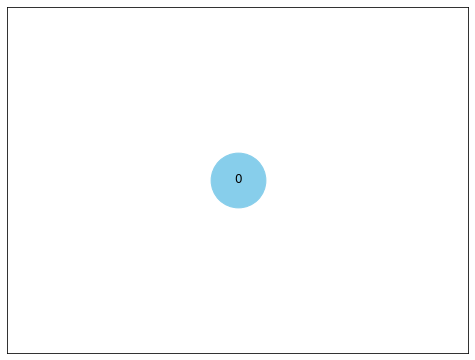

[0, 1, 3, 4, 5, 6, 7, 8, 15]


In [22]:
A = [4, 7, 3, 1, 8, 15, 0, 5, 6]
MAX = len(A)

# Ustaveni hromady
left = int(MAX / 2) - 1
right = MAX - 1

print("=== ESTABLISH HEAP ===");
print(f"SiftDown(0, {left}) - to all non-leaf nodes")
visualize_heap(A, 0, right)

for i in irange(left, 0, -1):
    SiftDown(A, i, right)

visualize_heap(A, 0, right)

for right in irange(MAX-1, 1, -1):
    swap_elements(A, 0, right)           ;print(f"{A}\n"); print(f"== SIFTDOWN (A, 0, {right-1}) =="); visualize_heap(A, 0, right-1)
    SiftDown(A, 0, right-1)              ;visualize_heap(A, 0, right-1);
        
print(A)

### Zhodnocení heap sort
* Pracuje **in situ**
* **Není stabilní**
* **Nechová se přirozeně**
* **Linearitmická časová** složitost: n * log(n)